In [ ]:
# mount the google drive with google colab

In [ ]:
cd /content/drive/MyDrive/Potato disease

/content/drive/MyDrive/Potato disease


In [ ]:
!ls

 PlantVillage   PlantVillage.zip   potato_class_95.h5  'Potato Disease.ipynb'


In [ ]:
#!unzip PlantVillage.zip   # one time procedure, once unzipped not needed to run again

In [ ]:
#import all important libraries

import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

In [ ]:
#creating universal variables for future use

DATA_PATH = '/content/drive/MyDrive/Potato disease/PlantVillage'
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [ ]:
#load the dataset

dataset = tf.keras.preprocessing.image_dataset_from_directory(DATA_PATH, 
                                                              shuffle = True,
                                                              image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                              batch_size = BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [ ]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [ ]:
type(dataset.take(1))

tensorflow.python.data.ops.dataset_ops.TakeDataset

In [ ]:
# 2152/32 = 67.25, hence 68 batches have been created

In [ ]:
#function to get all the class name (they are getting class names based on folders we have)

class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
#exploring the dataset

for image_batch, label_batch in dataset.take(1):  #taking 1st batch
  print(image_batch.shape)
  print(label_batch.numpy())    #converting label_batch tensorflow into numpy array

(32, 256, 256, 3)
[2 1 1 1 1 1 0 2 0 1 0 0 0 0 0 0 0 0 1 2 1 1 0 0 1 1 1 0 1 1 0 0]


In [ ]:
# 32 = batch size
# 256 X 256 = shape of the picture
# 3 = channel(red, green, blue) 
# its a color image

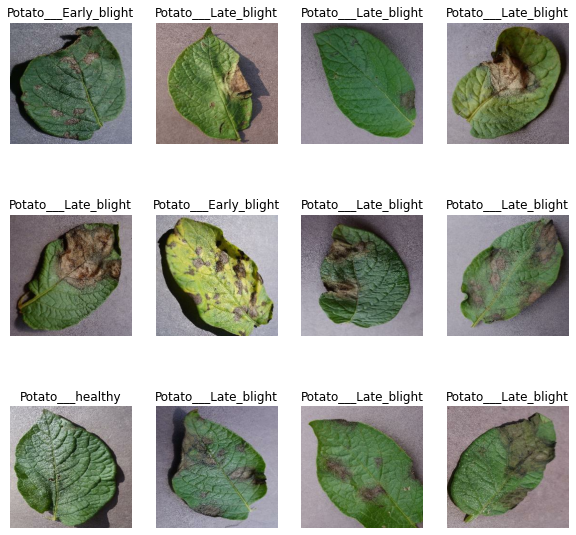

In [ ]:
#Visualising the data
    
plt.figure(figsize= (10,10))                                           
for image_batch, label_batch in dataset.take(1):  
  for i in range(12):
    ax = plt.subplot(3,4, i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))   #converting to numpy array coz matplotlib always takes array,and converting it to integer('uint8') as data we have is in float
    plt.title(class_names[label_batch[i]])
    plt.axis('off')       


In [ ]:
# In real time, we always split the data
# 80% training
# 10% validation
# 10% test

In [ ]:
len(dataset)

68

In [ ]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
# Hence taking first 54 batches for training data
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
testing_ds = dataset.skip(54)
len(testing_ds)

14

1.   total batches = 68
2.   training batches = 54
3.   test batches = 14

In [ ]:
# Further bifurcating test dataset into validation(10%) and test dataset(10%)

test_ds = testing_ds.take(7)
print(len(test_ds))

validation_ds = testing_ds.skip(7)
print(len(validation_ds))

7
7


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(36 , kernel_size=3 , activation='relu'))
model.add(layers.MaxPool2D((2,2))) 

model.add(layers.Conv2D(64 , kernel_size=3 , activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128 , kernel_size=3 , activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128 , kernel_size=3 , activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(64 , activation='relu'))

model.add(layers.Dense(3 , activation='softmax'))

In [ ]:
model.compile(optimizer='adam' , loss = tf.keras.losses.sparse_categorical_crossentropy , metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint = ModelCheckpoint('best_model.h5' , monitor = 'loss' , save_best_only= True)

In [ ]:
history = model.fit(train_ds , batch_size=BATCH_SIZE , epochs=15, validation_data= validation_ds, callbacks= [checkpoint])

Epoch 1/15
54/54 [==============================] - 542s 10s/step - loss: 6.0767 - accuracy: 0.6481 - val_loss: 0.6065 - val_accuracy: 0.8250
Epoch 2/15
54/54 [==============================] - 14s 255ms/step - loss: 0.3414 - accuracy: 0.8756 - val_loss: 0.2754 - val_accuracy: 0.8850
Epoch 3/15
54/54 [==============================] - 14s 252ms/step - loss: 0.1890 - accuracy: 0.9340 - val_loss: 0.2686 - val_accuracy: 0.8800
Epoch 4/15
54/54 [==============================] - 14s 254ms/step - loss: 0.1826 - accuracy: 0.9277 - val_loss: 0.3524 - val_accuracy: 0.9000
Epoch 5/15
54/54 [==============================] - 14s 254ms/step - loss: 0.1511 - accuracy: 0.9392 - val_loss: 0.1967 - val_accuracy: 0.9100
Epoch 6/15
54/54 [==============================] - 14s 255ms/step - loss: 0.2118 - accuracy: 0.9294 - val_loss: 0.3380 - val_accuracy: 0.8700
Epoch 7/15
54/54 [==============================] - 14s 253ms/step - loss: 0.1887 - accuracy: 0.9253 - val_loss: 0.1494 - val_accuracy: 0.9450


In [ ]:
model.evaluate(test_ds)

7/7 [==============================] - 5s 103ms/step - loss: 0.2050 - accuracy: 0.9598


[0.2050137221813202, 0.9598214030265808]

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
model.save('potato_class_95.h5')   #not required if model saved via checkpoint method

In [ ]:
ls

 best_model.h5   PlantVillage.zip    'Potato Disease.ipynb'
 PlantVillage/   potato_class_95.h5


In [ ]:
# loading of a model

loaded_model = tf.keras.models.load_model('potato_class_95.h5')
image_path = '/content/drive/MyDrive/Potato disease/PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG'

test_image = tf.keras.preprocessing.image.load_img(image_path , target_size= (256,256))  #converting to JPEG image
print(type(test_image))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)    #converting image to array
print(type(test_image))

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>


In [ ]:
print(test_image.shape)

(256, 256, 3)


In [ ]:
import numpy as np

test_image = np.expand_dims(test_image , axis = 0)  #increasing dimension to 4D since trained model is of 4D(batch size,height, width, channel)
print(test_image.shape)
loaded_model.predict(test_image)

(1, 256, 256, 3)


array([[1.0000000e+00, 4.8213742e-15, 8.5322691e-24]], dtype=float32)

In [ ]:
pred_value = loaded_model.predict(test_image)
class_names[np.argmax(pred_value)]    # taking highest value of index of pred_value by argmax

'Potato___Early_blight'



> Hence its classifying it as Potato Early Blight, which is correct prediction.

